In [18]:
import pandas as pd
import matplotlib as plt
import math
from datetime import datetime, date

## Read file and EDA

In [2]:
raw = pd.read_csv('MDB.csv')
raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-19,33.000000,34.000000,29.100000,32.07,32.07,11508500
1,2017-10-20,33.369999,33.369999,30.100000,30.68,30.68,2358700
2,2017-10-23,30.510000,31.330000,30.190001,30.50,30.50,749400
3,2017-10-24,30.459999,30.920000,30.438999,30.57,30.57,420700
4,2017-10-25,30.500000,31.100000,29.879999,31.00,31.00,1219400


<AxesSubplot:xlabel='Date'>

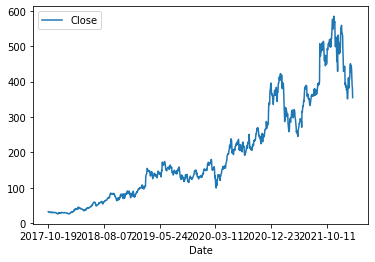

In [3]:
raw.plot.line(x='Date', y='Close')

In [4]:
raw.agg({'Date': ['min','max']})

,Date
min,2017-10-19
max,2022-02-23


In [5]:
len(raw['Date'].unique())

1094

## Calculate VWAP for every start date

In [6]:
raw['PV'] = raw['Close']*raw['Volume']
raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PV
0,2017-10-19,33.000000,34.000000,29.100000,32.07,32.07,11508500,369077595.0
1,2017-10-20,33.369999,33.369999,30.100000,30.68,30.68,2358700,72364916.0
2,2017-10-23,30.510000,31.330000,30.190001,30.50,30.50,749400,22856700.0
3,2017-10-24,30.459999,30.920000,30.438999,30.57,30.57,420700,12860799.0
4,2017-10-25,30.500000,31.100000,29.879999,31.00,31.00,1219400,37801400.0


In [7]:
raw['PV_lookback'] = raw['PV'].rolling(60).sum()
raw[~raw['PV_lookback'].isnull()].head()

,Date,Open,High,Low,Close,Adj Close,Volume,PV,PV_lookback
59,2018-01-16,29.459999,29.870001,28.969999,29.059999,29.059999,169500,4.925670e+06,1.005068e+09
60,2018-01-17,29.200001,29.590000,29.200001,29.530001,29.530001,160500,4.739565e+06,6.407300e+08
61,2018-01-18,29.469999,29.643999,28.841000,29.080000,29.080000,108000,3.140640e+06,5.715057e+08
62,2018-01-19,28.860001,29.490000,28.610001,29.120001,29.120001,224000,6.522880e+06,5.551719e+08
63,2018-01-22,29.129999,29.400000,28.340000,28.809999,28.809999,131000,3.774110e+06,5.460852e+08


In [8]:
raw['Volume_lookback'] = raw['Volume'].rolling(60).sum()
raw[~raw['PV_lookback'].isnull()].head()

,Date,Open,High,Low,Close,Adj Close,Volume,PV,PV_lookback,Volume_lookback
59,2018-01-16,29.459999,29.870001,28.969999,29.059999,29.059999,169500,4.925670e+06,1.005068e+09,33144800.0
60,2018-01-17,29.200001,29.590000,29.200001,29.530001,29.530001,160500,4.739565e+06,6.407300e+08,21796800.0
61,2018-01-18,29.469999,29.643999,28.841000,29.080000,29.080000,108000,3.140640e+06,5.715057e+08,19546100.0
62,2018-01-19,28.860001,29.490000,28.610001,29.120001,29.120001,224000,6.522880e+06,5.551719e+08,19020700.0
63,2018-01-22,29.129999,29.400000,28.340000,28.809999,28.809999,131000,3.774110e+06,5.460852e+08,18731000.0


In [9]:
raw['VWAP'] = raw['PV_lookback']/raw['Volume_lookback']
raw[~raw['VWAP'].isnull()].head()

,Date,Open,High,Low,Close,Adj Close,Volume,PV,PV_lookback,Volume_lookback,VWAP
59,2018-01-16,29.459999,29.870001,28.969999,29.059999,29.059999,169500,4.925670e+06,1.005068e+09,33144800.0,30.323551
60,2018-01-17,29.200001,29.590000,29.200001,29.530001,29.530001,160500,4.739565e+06,6.407300e+08,21796800.0,29.395599
61,2018-01-18,29.469999,29.643999,28.841000,29.080000,29.080000,108000,3.140640e+06,5.715057e+08,19546100.0,29.238862
62,2018-01-19,28.860001,29.490000,28.610001,29.120001,29.120001,224000,6.522880e+06,5.551719e+08,19020700.0,29.187775
63,2018-01-22,29.129999,29.400000,28.340000,28.809999,28.809999,131000,3.774110e+06,5.460852e+08,18731000.0,29.154088


<AxesSubplot:xlabel='Date'>

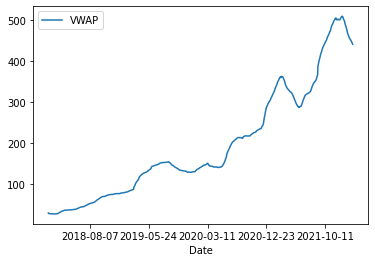

In [10]:
raw.plot.line(x='Date', y='VWAP')

In [11]:
final = raw[raw['Date']>='2018-02-01'].reset_index(drop=True)
final.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PV,PV_lookback,Volume_lookback,VWAP
0,2018-02-01,26.740000,27.799999,26.650000,27.450001,27.450001,149100,4.092795e+06,4.483591e+08,15642100.0,28.663612
1,2018-02-02,27.290001,27.480000,26.410000,26.520000,26.520000,169200,4.487184e+06,4.435163e+08,15506500.0,28.601964
2,2018-02-05,26.000000,27.020000,25.559999,25.879999,25.879999,179800,4.653224e+06,4.398526e+08,15407300.0,28.548323
3,2018-02-06,25.620001,26.030001,25.160000,25.780001,25.780001,76900,1.982482e+06,4.346250e+08,15242900.0,28.513276
4,2018-02-07,25.700001,26.469999,25.370001,26.389999,26.389999,74500,1.966055e+06,4.306097e+08,15112700.0,28.493237


In [12]:
final.drop(columns=['Open', 'High', 'Low', 'PV', 'PV_lookback', 'Volume_lookback'], inplace=True)
final.head()

,Date,Close,Adj Close,Volume,VWAP
0,2018-02-01,27.450001,27.450001,149100,28.663612
1,2018-02-02,26.520000,26.520000,169200,28.601964
2,2018-02-05,25.879999,25.879999,179800,28.548323
3,2018-02-06,25.780001,25.780001,76900,28.513276
4,2018-02-07,26.389999,26.389999,74500,28.493237


## Calculate stocks alloted and vesting start date

In [13]:
allocation = 160000
final['slots_alotted'] = final.apply(lambda x: math.ceil(allocation/x['VWAP']), axis=1)
final.head()

,Date,Close,Adj Close,Volume,VWAP,slots_alotted
0,2018-02-01,27.450001,27.450001,149100,28.663612,5582
1,2018-02-02,26.520000,26.520000,169200,28.601964,5595
2,2018-02-05,25.879999,25.879999,179800,28.548323,5605
3,2018-02-06,25.780001,25.780001,76900,28.513276,5612
4,2018-02-07,26.389999,26.389999,74500,28.493237,5616


In [14]:
def find_vest_start_date(date):
    start_d = datetime.strptime(date, '%Y-%m-%d')
    start_m = start_d.month
    vest_m = ((((start_m-1)//3+1)*3)+1)%12
    vest_y = start_d.year if vest_m in [4, 7, 10] else start_d.year + 1
    vest_d = datetime(vest_y, vest_m, 1, 0, 0)
    return vest_d

final['vest_start_date'] = final.apply(lambda x: find_vest_start_date(x['Date']), axis=1)
final.head(10)

,Date,Close,Adj Close,Volume,VWAP,slots_alotted,vest_start_date
0,2018-02-01,27.450001,27.450001,149100,28.663612,5582,2018-04-01
1,2018-02-02,26.520000,26.520000,169200,28.601964,5595,2018-04-01
2,2018-02-05,25.879999,25.879999,179800,28.548323,5605,2018-04-01
3,2018-02-06,25.780001,25.780001,76900,28.513276,5612,2018-04-01
4,2018-02-07,26.389999,26.389999,74500,28.493237,5616,2018-04-01
5,2018-02-08,26.500000,26.500000,150200,28.457928,5623,2018-04-01
6,2018-02-09,26.400000,26.400000,175900,28.389940,5636,2018-04-01
7,2018-02-12,27.160000,27.160000,98100,28.369510,5640,2018-04-01
8,2018-02-13,28.150000,28.150000,88700,28.353305,5644,2018-04-01
9,2018-02-14,30.129999,30.129999,422600,28.388724,5637,2018-04-01


In [15]:
final.loc[(final['Date'] == '2019-01-02') | (final['Date'] =='2020-11-19') |(final['Date'] == '2021-03-30')|(final['Date'] == '2022-02-14')]

,Date,Close,Adj Close,Volume,VWAP,slots_alotted,vest_start_date
230,2019-01-02,79.949997,79.949997,1325100,77.849018,2056,2019-04-01
706,2020-11-19,255.110001,255.110001,1336900,234.519685,683,2021-01-01
794,2021-03-30,259.690002,259.690002,1105700,341.764368,469,2021-04-01
1016,2022-02-14,429.929993,429.929993,644200,450.074663,356,2022-04-01


<AxesSubplot:xlabel='Date'>

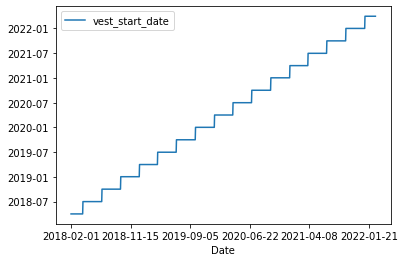

In [16]:
final.plot.line(x='Date', y='vest_start_date')

## Calculate last vest date and stocks vested as of today

In [29]:
def find_last_vest():
    today = date.today()
    vest_m = (((today.month - 1) // 3) * 3) + 1
    vest = datetime(today.year, vest_m, 1, 0, 0)
    return vest

last_vest = find_last_vest()
last_vest

datetime.datetime(2022, 1, 1, 0, 0)

In [35]:
def find_qrtrs_vested(vest_start):
    return ((last_vest.year - vest_start.year)*12 + (last_vest.month - vest_start.month)) // 3

final['quarters_vested'] = final.apply(lambda x: find_qrtrs_vested(x['vest_start_date']), axis=1)
final.head(10)

,Date,Close,Adj Close,Volume,VWAP,slots_alotted,vest_start_date,quarters_vested
0,2018-02-01,27.450001,27.450001,149100,28.663612,5582,2018-04-01,15
1,2018-02-02,26.520000,26.520000,169200,28.601964,5595,2018-04-01,15
2,2018-02-05,25.879999,25.879999,179800,28.548323,5605,2018-04-01,15
3,2018-02-06,25.780001,25.780001,76900,28.513276,5612,2018-04-01,15
4,2018-02-07,26.389999,26.389999,74500,28.493237,5616,2018-04-01,15
5,2018-02-08,26.500000,26.500000,150200,28.457928,5623,2018-04-01,15
6,2018-02-09,26.400000,26.400000,175900,28.389940,5636,2018-04-01,15
7,2018-02-12,27.160000,27.160000,98100,28.369510,5640,2018-04-01,15
8,2018-02-13,28.150000,28.150000,88700,28.353305,5644,2018-04-01,15
9,2018-02-14,30.129999,30.129999,422600,28.388724,5637,2018-04-01,15


<AxesSubplot:xlabel='Date'>

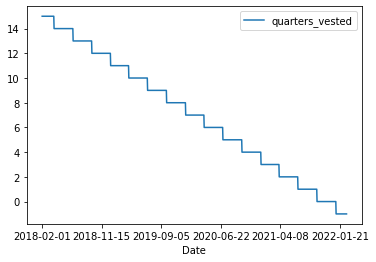

In [37]:
final.plot.line(x='Date', y='quarters_vested')

In [39]:
def calc_stocks_vested(slots_alotted, quarters_vested):
    if quarters_vested < 4 :
        return 0
    return math.ceil((quarters_vested / 16) * slots_alotted)

final['stocks_vested'] = final.apply(lambda x: calc_stocks_vested(x['slots_alotted'], x['quarters_vested']) , axis = 1)
final.head()

,Date,Close,Adj Close,Volume,VWAP,slots_alotted,vest_start_date,quarters_vested,stocks_vested
0,2018-02-01,27.450001,27.450001,149100,28.663612,5582,2018-04-01,15,5234
1,2018-02-02,26.520000,26.520000,169200,28.601964,5595,2018-04-01,15,5246
2,2018-02-05,25.879999,25.879999,179800,28.548323,5605,2018-04-01,15,5255
3,2018-02-06,25.780001,25.780001,76900,28.513276,5612,2018-04-01,15,5262
4,2018-02-07,26.389999,26.389999,74500,28.493237,5616,2018-04-01,15,5265


In [40]:
final.loc[(final['Date'] == '2019-01-02') | (final['Date'] =='2020-11-19') |(final['Date'] == '2021-03-30')|(final['Date'] == '2022-02-14')]

,Date,Close,Adj Close,Volume,VWAP,slots_alotted,vest_start_date,quarters_vested,stocks_vested
230,2019-01-02,79.949997,79.949997,1325100,77.849018,2056,2019-04-01,11,1414
706,2020-11-19,255.110001,255.110001,1336900,234.519685,683,2021-01-01,4,171
794,2021-03-30,259.690002,259.690002,1105700,341.764368,469,2021-04-01,3,0
1016,2022-02-14,429.929993,429.929993,644200,450.074663,356,2022-04-01,-1,0


## Calculate amount vested and current FMV & gains

In [46]:
close_price = final.iloc[-1, 1]

final['amount_vested'] = final.apply(lambda x: x['stocks_vested']*x['VWAP'], axis = 1)
final['current_FMV'] = final.apply(lambda x: x['stocks_vested']*close_price, axis = 1)
final.head(10)

,Date,Close,Adj Close,Volume,VWAP,slots_alotted,vest_start_date,quarters_vested,stocks_vested,amount_vested,current_FMV
0,2018-02-01,27.450001,27.450001,149100,28.663612,5582,2018-04-01,15,5234,150025.347517,1.857076e+06
1,2018-02-02,26.520000,26.520000,169200,28.601964,5595,2018-04-01,15,5246,150045.900808,1.861333e+06
2,2018-02-05,25.879999,25.879999,179800,28.548323,5605,2018-04-01,15,5255,150021.439072,1.864527e+06
3,2018-02-06,25.780001,25.780001,76900,28.513276,5612,2018-04-01,15,5262,150036.860224,1.867010e+06
4,2018-02-07,26.389999,26.389999,74500,28.493237,5616,2018-04-01,15,5265,150016.892317,1.868075e+06
5,2018-02-08,26.500000,26.500000,150200,28.457928,5623,2018-04-01,15,5272,150030.195406,1.870558e+06
6,2018-02-09,26.400000,26.400000,175900,28.389940,5636,2018-04-01,15,5284,150012.441755,1.874816e+06
7,2018-02-12,27.160000,27.160000,98100,28.369510,5640,2018-04-01,15,5288,150017.966412,1.876235e+06
8,2018-02-13,28.150000,28.150000,88700,28.353305,5644,2018-04-01,15,5292,150045.687631,1.877655e+06
9,2018-02-14,30.129999,30.129999,422600,28.388724,5637,2018-04-01,15,5285,150034.405737,1.875171e+06


In [49]:
vested = final[final['quarters_vested'] >= 4].reset_index(drop=True)
vested.head()

,Date,Close,Adj Close,Volume,VWAP,slots_alotted,vest_start_date,quarters_vested,stocks_vested,amount_vested,current_FMV
0,2018-02-01,27.450001,27.450001,149100,28.663612,5582,2018-04-01,15,5234,150025.347517,1.857076e+06
1,2018-02-02,26.520000,26.520000,169200,28.601964,5595,2018-04-01,15,5246,150045.900808,1.861333e+06
2,2018-02-05,25.879999,25.879999,179800,28.548323,5605,2018-04-01,15,5255,150021.439072,1.864527e+06
3,2018-02-06,25.780001,25.780001,76900,28.513276,5612,2018-04-01,15,5262,150036.860224,1.867010e+06
4,2018-02-07,26.389999,26.389999,74500,28.493237,5616,2018-04-01,15,5265,150016.892317,1.868075e+06


In [50]:
vested['total_gains'] = vested.apply(lambda x: (x['current_FMV']/x['amount_vested'])-1, axis = 1)
vested['yearly_gains'] = vested.apply(lambda x : x['total_gains']/x['quarters_vested']*4, axis = 1)
vested.head()

,Date,Close,Adj Close,Volume,VWAP,slots_alotted,vest_start_date,quarters_vested,stocks_vested,amount_vested,current_FMV,total_gains,yearly_gains
0,2018-02-01,27.450001,27.450001,149100,28.663612,5582,2018-04-01,15,5234,150025.347517,1.857076e+06,11.378412,3.034243
1,2018-02-02,26.520000,26.520000,169200,28.601964,5595,2018-04-01,15,5246,150045.900808,1.861333e+06,11.405092,3.041358
2,2018-02-05,25.879999,25.879999,179800,28.548323,5605,2018-04-01,15,5255,150021.439072,1.864527e+06,11.428401,3.047573
3,2018-02-06,25.780001,25.780001,76900,28.513276,5612,2018-04-01,15,5262,150036.860224,1.867010e+06,11.443677,3.051647
4,2018-02-07,26.389999,26.389999,74500,28.493237,5616,2018-04-01,15,5265,150016.892317,1.868075e+06,11.452429,3.053981


In [52]:
vested.loc[(vested['Date'] == '2019-01-02') | (vested['Date'] =='2020-11-19') |(vested['Date'] == '2021-03-30')|(vested['Date'] == '2022-02-14')]

,Date,Close,Adj Close,Volume,VWAP,slots_alotted,vest_start_date,quarters_vested,stocks_vested,amount_vested,current_FMV,total_gains,yearly_gains
230,2019-01-02,79.949997,79.949997,1325100,77.849018,2056,2019-04-01,11,1414,110078.510857,501701.337172,3.557668,1.293698
706,2020-11-19,255.110001,255.110001,1336900,234.519685,683,2021-01-01,4,171,40102.866135,60672.509658,0.512922,0.512922


<AxesSubplot:xlabel='Date'>

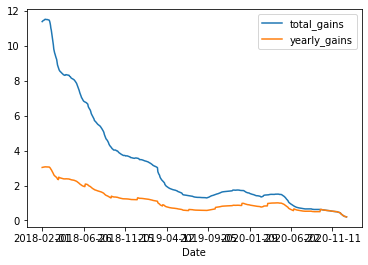

In [53]:
vested.plot.line(x='Date', y=['total_gains', 'yearly_gains'])

<AxesSubplot:xlabel='Date'>

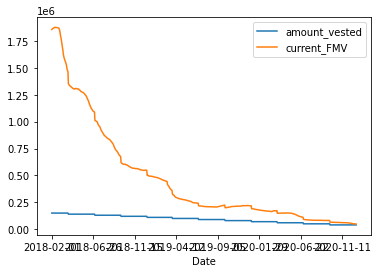

In [54]:
vested.plot.line(x='Date', y=['amount_vested', 'current_FMV'])

In [55]:
vested[vested['Date'] == '2019-03-01']

,Date,Close,Adj Close,Volume,VWAP,slots_alotted,vest_start_date,quarters_vested,stocks_vested,amount_vested,current_FMV,total_gains,yearly_gains
270,2019-03-01,104.160004,104.160004,944700,86.079959,1859,2019-04-01,11,1279,110096.267547,453801.987442,3.121865,1.135224


In [56]:
vested['yearly_gains'].mean()

1.1215911390169613